In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_parquet(r'janestreet\jane-street-real-time-market-data-forecasting\train.parquet\partition_id=4\part-0.parquet')


In [17]:
df

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,680,0,0,2.298160,0.851814,1.197591,0.219422,0.411698,2.057359,-0.542597,...,-0.195100,-0.304665,0.164485,-0.205231,0.191064,-1.413209,0.375675,0.929775,-1.574939,1.101371
1,680,0,1,3.928745,0.534441,1.079740,0.038748,0.275343,2.135057,-0.541966,...,-0.470271,0.089769,0.011395,0.092348,0.473781,0.397024,0.777026,0.826995,0.569681,1.986971
2,680,0,2,1.340433,-0.227643,0.764146,-0.243349,0.247027,2.347248,-0.478477,...,0.152837,0.218281,0.060373,-0.164715,-0.132612,0.543831,-0.123519,-0.296969,0.547286,-0.049303
3,680,0,3,1.695526,0.267686,1.193612,-0.388798,0.030673,2.175273,-0.408371,...,11.179185,-0.012298,1.047678,-0.696032,0.960062,2.328890,0.718955,2.047506,3.691308,3.031337
4,680,0,5,2.700766,0.952372,0.861269,-0.375405,0.259099,2.497325,-0.618828,...,-0.770234,-0.229585,-0.240741,-0.887929,-0.061485,0.691569,1.016049,0.103898,0.814866,2.073280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022947,849,967,34,1.320814,-1.135969,-1.610122,-1.160252,-1.541175,-0.177305,-0.503478,...,0.044115,1.111880,-1.623336,-2.352973,0.618814,0.261707,-1.148116,0.019118,0.035589,0.021048
5022948,849,967,35,1.478998,-1.805648,-2.178270,-1.376917,-1.692970,-0.505028,-0.422419,...,-0.230330,0.765486,1.303708,5.000000,-0.073899,-0.051414,1.282058,-0.010037,0.025545,-0.050791
5022949,849,967,36,1.145991,-1.962125,-1.765331,-1.641831,-1.397208,-0.210446,-0.322906,...,-0.331187,-0.008548,0.156050,-5.000000,-0.262077,-0.118867,-1.348349,0.015093,0.027283,0.014007
5022950,849,967,37,1.624830,-1.603198,-1.990240,-0.389927,-1.518245,-0.720761,-0.280535,...,-0.131612,0.967296,-0.007091,0.974733,-0.718463,-0.329689,-0.213125,-0.229978,-0.082040,-0.438307


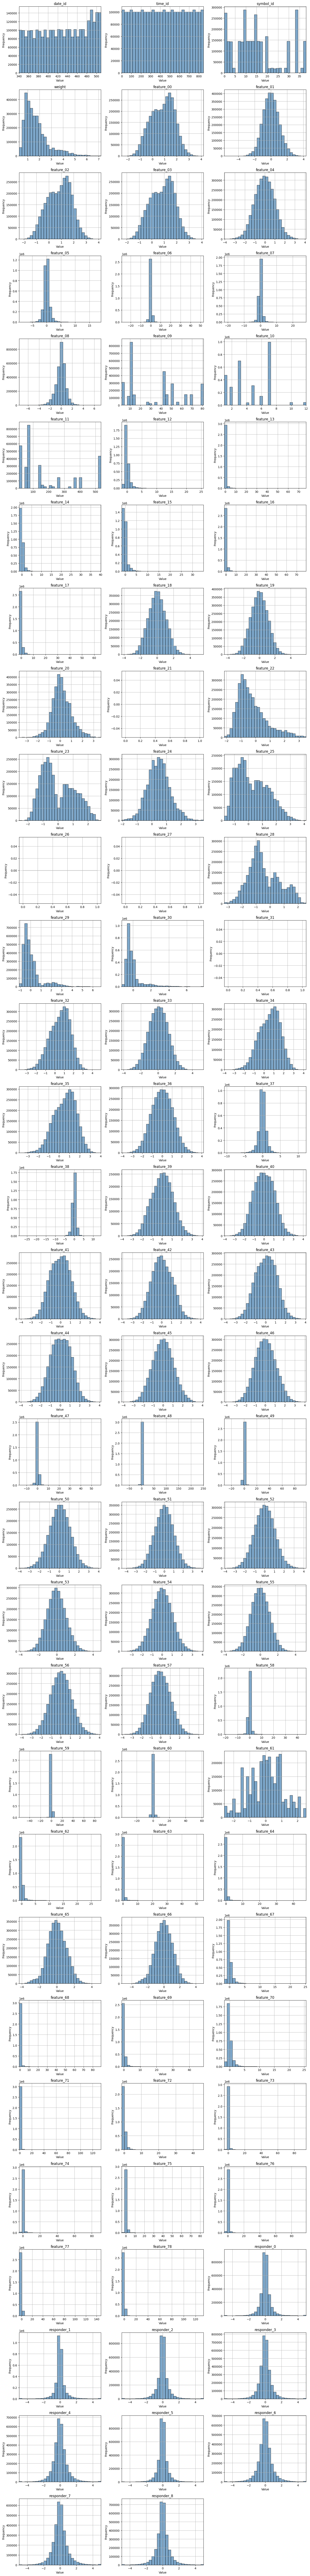

In [14]:
# Get the number of columns
num_cols = len(df.columns)

# Choose the layout of the subplots (e.g., 3 columns wide)
# Adjust the layout depending on how many columns you have.
ncols = 3
nrows = int(np.ceil(num_cols / ncols))

# Create the figure and axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))

# Flatten axes for easy indexing (in case we have multiple rows)
axes = axes.flatten()

# Plot histogram for each column
for i, col in enumerate(df.columns):
    ax = axes[i]
    # Get column data range
    col_min, col_max = df[col].min(), df[col].max()
    
    # Plot the histogram
    df[col].hist(ax=ax, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    
    # Set x-limits to the min and max of the data
    if np.isfinite(col_min) and np.isfinite(col_max):
        ax.set_xlim(col_min, col_max)
    
    # Add labels and title
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots if the number of columns is not a multiple of ncols
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()